# GMM (Gaussian Mixture Models)

Qué pasaría si yo tengo los datos de pesos y alturas pero no la clasificación por género? Si tomo a todos los valores como pertenecientes a una única categoría, voy a generar una gaussiana uni-variable, como media y covarianza dados por la totalidad de los valores.

El modelo de GMM permite modelar los datos como una gaussiana **multi-variable**, para un número determinado de componentes (n). En el caso del problema de clasificar hombres y mujeres, $ n = 2 $

In [1]:
# Estos dos comandos evitan que haya que hacer reload cada vez que se modifica un paquete
%load_ext autoreload
%autoreload 2

In [2]:
from sklearn.mixture import GaussianMixture

In [3]:
import pandas as pd
df = pd.read_csv('alturas-pesos-1-train.csv')

In [4]:
pesos_alturas = df[['Peso', 'Altura']].values

In [5]:
model = GaussianMixture(n_components=2, covariance_type='full', init_params='kmeans', max_iter=10000, tol=0.0001)

In [6]:
model.fit(pesos_alturas)

GaussianMixture(max_iter=10000, n_components=2, tol=0.0001)

Scikit-learn asigna a los parámetros **estimados** luego de correr el método `fit` con un underscore `_` al final. De esta manera podemos saber que se trata de una propiedad o variable estimada por el modelo

In [10]:
model.means_

array([[ 84.01749406, 174.54179157],
       [ 60.65461028, 160.73175005]])

In [8]:
model.covariances_

array([[[79.83813643, 54.6210906 ],
        [54.6210906 , 51.28423416]],

       [[75.22233469, 49.79701663],
        [49.79701663, 46.86474106]]])

In [13]:
model.means_[0]

array([ 84.01749406, 174.54179157])

C:\Users\jvidela\development\diplo-dl\02_Probabilidad\helper.py:148: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


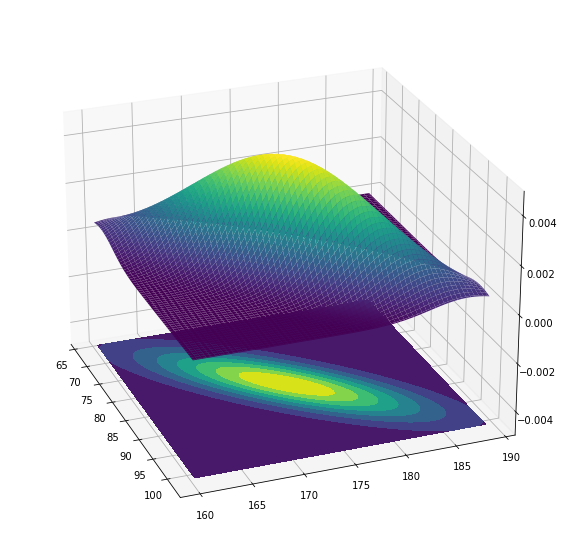

In [14]:
from helper import plot_mv_gaussian

# Modelo generado para hombres
plot_mv_gaussian(model.means_[0],model.covariances_[0])

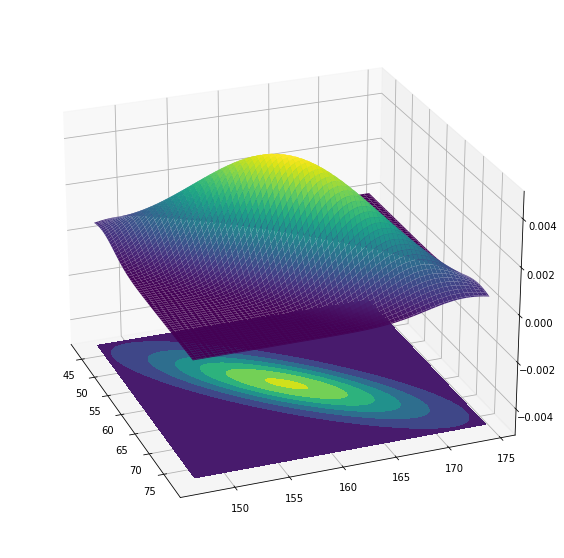

In [15]:
# Modelo generado para mujeres
plot_mv_gaussian(model.means_[1],model.covariances_[1])

In [16]:
# Ver parámetros con los que generé el modelo
model.get_params()

{'covariance_type': 'full',
 'init_params': 'kmeans',
 'max_iter': 10000,
 'means_init': None,
 'n_components': 2,
 'n_init': 1,
 'precisions_init': None,
 'random_state': None,
 'reg_covar': 1e-06,
 'tol': 0.0001,
 'verbose': 0,
 'verbose_interval': 10,
 'warm_start': False,
 'weights_init': None}

# De la notebook anterior